In [21]:
# Loading libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from IPython.display import Image

In [22]:
# gPU enviroments
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))


Num GPUs Available:  0


In [23]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [24]:
# Loading Model MobileNet
model = tf.keras.applications.MobileNet()

In [25]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [26]:
# Image pre processing
def prepare_image(file):
    img_path = '/content/gdrive/MyDrive/Colab Notebooks/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

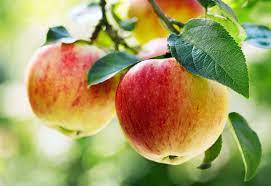

In [27]:
Image(filename='/content/gdrive/MyDrive/Colab Notebooks/app.jpg', width=300,height=200) 


In [29]:
preprocessed_image = prepare_image('app.jpg')
predictions = model.predict(preprocessed_image)

1/1 [==============================] - 0s 446ms/step


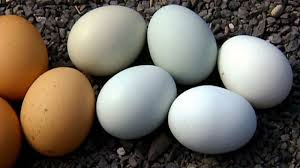

In [31]:
Image(filename='/content/gdrive/MyDrive/Colab Notebooks/egg.jpg', width=300,height=200)

In [32]:
preprocessed_image = prepare_image('egg.jpg')
predictions = model.predict(preprocessed_image)

1/1 [==============================] - 0s 41ms/step


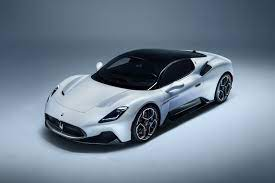

In [34]:
Image(filename='/content/gdrive/MyDrive/Colab Notebooks/crr.jpg', width=300,height=200)

In [35]:
preprocessed_image = prepare_image('crr.jpg')
predictions = model.predict(preprocessed_image)

1/1 [==============================] - 0s 45ms/step


In [36]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04285008', 'sports_car', 0.9809276),
  ('n04037443', 'racer', 0.01124491),
  ('n03100240', 'convertible', 0.00451498),
  ('n02974003', 'car_wheel', 0.0013956737),
  ('n03459775', 'grille', 0.00029513446)]]